# Statistical analysis of benchmarking results
We executed a two ppure ImageJ macros and two more macros using CLIJ and saved execution times as ImageJ-xls file. We performed these experiment on four test computers with this specified CPU/GPU hardware:
 1. Intel i5-8265U CPU/ Intel UHD 620 integrated GPU
 2. Intel i7-8750H CPU/ NVidia Geforce 2080 Ti RTX external GPU
 3. AMD Ryzen 4700U CPU/ AMD Vega 7 integrated GPU
 4. Intel i7-7920HQ CPU/ AMD Radeon Pro 560 dedicated GPU
 
This notebook serves summarizing these xls files.

In [1]:
import numpy as np

folder1 = "benchmarking_ulice"
folder2 = "benchmarking_perlis"
folder3 = "benchmarking_hopper"
folder4 = "benchmarking_dani"

workflow_W_IJ = "original_analysis_timing.xls"
workflow_W_CLIJ = "clij_analysis_timing.xls"
workflow_W_OPT_IJ = "original_opti_analysis_timing.xls"
workflow_W_OPT_CLIJ = "clij_opti_analysis_timing.xls"

# convenience function for reading the xls files
def read_data(filename):
    data = np.loadtxt(filename, delimiter=',', skiprows=1)
    
    data = np.abs(data)
    return data

# convenience function for descriptive statistics 
def analyse_processing_time(filename):
    print(filename)
    data = read_data(filename)
    
    median = np.median(data)
    minimum = np.min(data)
    maximum = np.max(data)
    stddev = np.std(data)
    
    return median, stddev, minimum, maximum
    
def format_output(stats):
    median, stddev, minimum, maximum = stats
    return "\makecell{" + str(round(median)) + " $\pm$ " + str(round(stddev)) + " \\\\\n(" + str(round(minimum)) + " ... "  + str(round(maximum)) + ")}"

data1_W_IJ = read_data("../" + folder1 + "/" + workflow_W_IJ)
data1_W_CLIJ = read_data("../" + folder1 + "/" + workflow_W_CLIJ)
data1_W_OPT_IJ = read_data("../" + folder1 + "/" + workflow_W_OPT_IJ)
data1_W_OPT_CLIJ = read_data("../" + folder1 + "/" + workflow_W_OPT_CLIJ)

data2_W_IJ = read_data("../" + folder2 + "/" + workflow_W_IJ)
data2_W_CLIJ = read_data("../" + folder2 + "/" + workflow_W_CLIJ)
data2_W_OPT_IJ = read_data("../" + folder2 + "/" + workflow_W_OPT_IJ)
data2_W_OPT_CLIJ = read_data("../" + folder2 + "/" + workflow_W_OPT_CLIJ)

data3_W_IJ = read_data("../" + folder3 + "/" + workflow_W_IJ)
data3_W_CLIJ = read_data("../" + folder3 + "/" + workflow_W_CLIJ)
data3_W_OPT_IJ = read_data("../" + folder3 + "/" + workflow_W_OPT_IJ)
data3_W_OPT_CLIJ = read_data("../" + folder3 + "/" + workflow_W_OPT_CLIJ)

data4_W_IJ = read_data("../" + folder4 + "/" + workflow_W_IJ)
data4_W_CLIJ = read_data("../" + folder4 + "/" + workflow_W_CLIJ)
data4_W_OPT_IJ = read_data("../" + folder4 + "/" + workflow_W_OPT_IJ)
data4_W_OPT_CLIJ = read_data("../" + folder4 + "/" + workflow_W_OPT_CLIJ)


# Boxplots

We're drawing the complex performance / timing measurements as boxplots to get an overview.

In [2]:
import matplotlib.pyplot as plt

# convenience function for drawing the box plots
def draw_box_plot(data, title):
    fig1, ax1 = plt.subplots(figsize=(6, 6), dpi=150)
    ax1.set_title(title)
    bplot = ax1.boxplot(data,patch_artist=True)
        
    colors = ['blue', 'green', 'blue', 'green']
    lightcolors = ['lightblue', 'lightgreen', 'lightblue', 'lightgreen']
    for patch, color, lightcolor in zip(bplot['boxes'], colors, lightcolors):
        patch.set_color(color)
        patch.set_facecolor(lightcolor)

    plt.xticks([1, 2, 3, 4], ['W-IJ', 'W-CLIJ', 'W-OPT-IJ', 'W-OPT-CLIJ'])
    plt.ylabel("Processing time / ms")


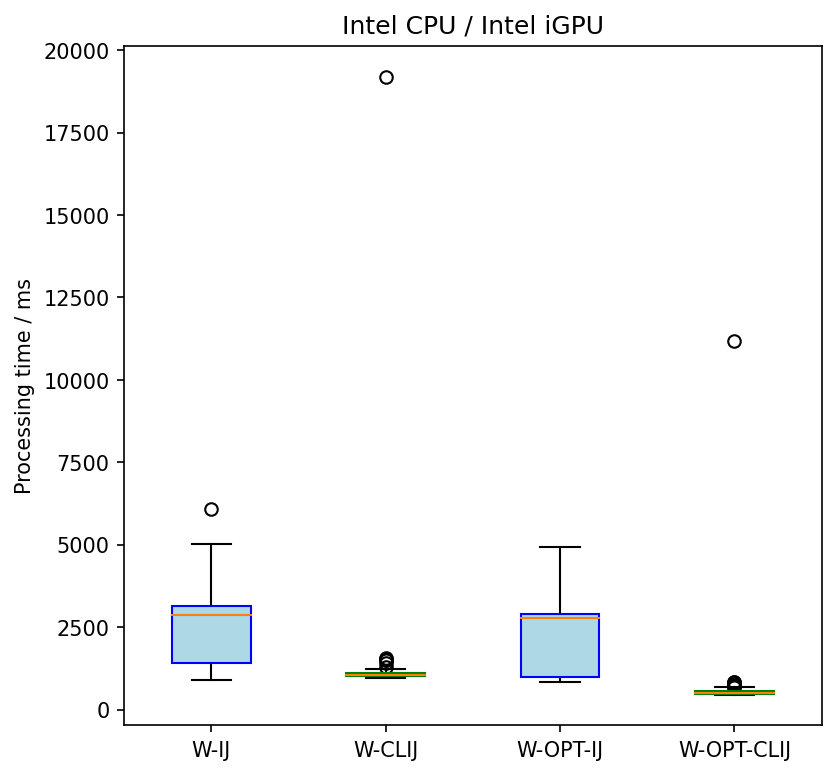

In [3]:
draw_box_plot(
    [
        data1_W_IJ, 
        data1_W_CLIJ, 
        data1_W_OPT_IJ, 
        data1_W_OPT_CLIJ
    ], "Intel CPU / Intel iGPU"
)

plt.savefig("../tex/fig/benchmark_computer1.pdf", dpi=150)

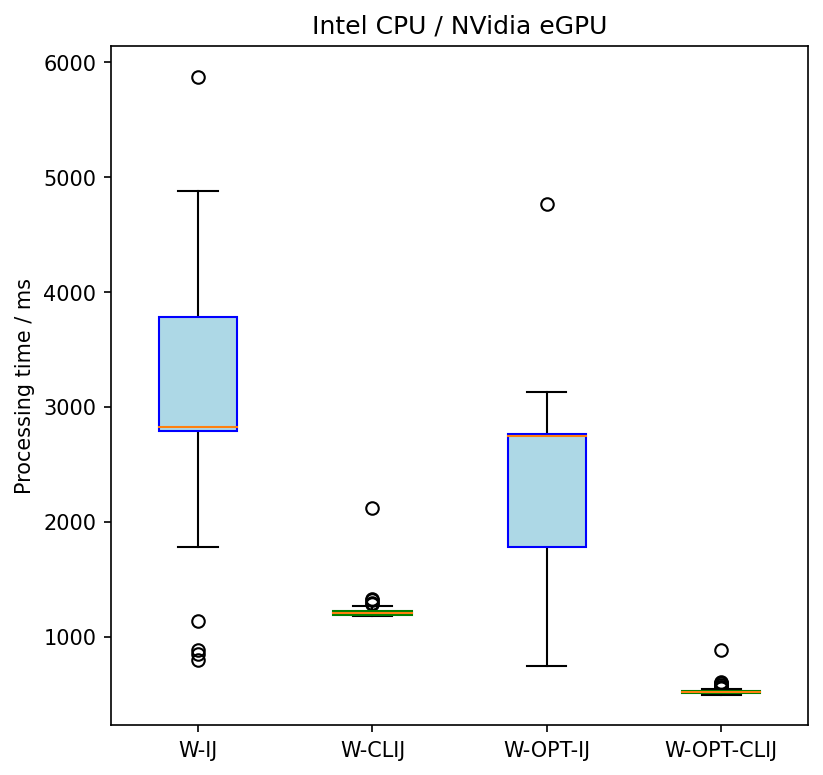

In [4]:
draw_box_plot(
    [
        data2_W_IJ, 
        data2_W_CLIJ, 
        data2_W_OPT_IJ, 
        data2_W_OPT_CLIJ
    ], "Intel CPU / NVidia eGPU"
)

plt.savefig("../tex/fig/benchmark_computer2.pdf", dpi=150)

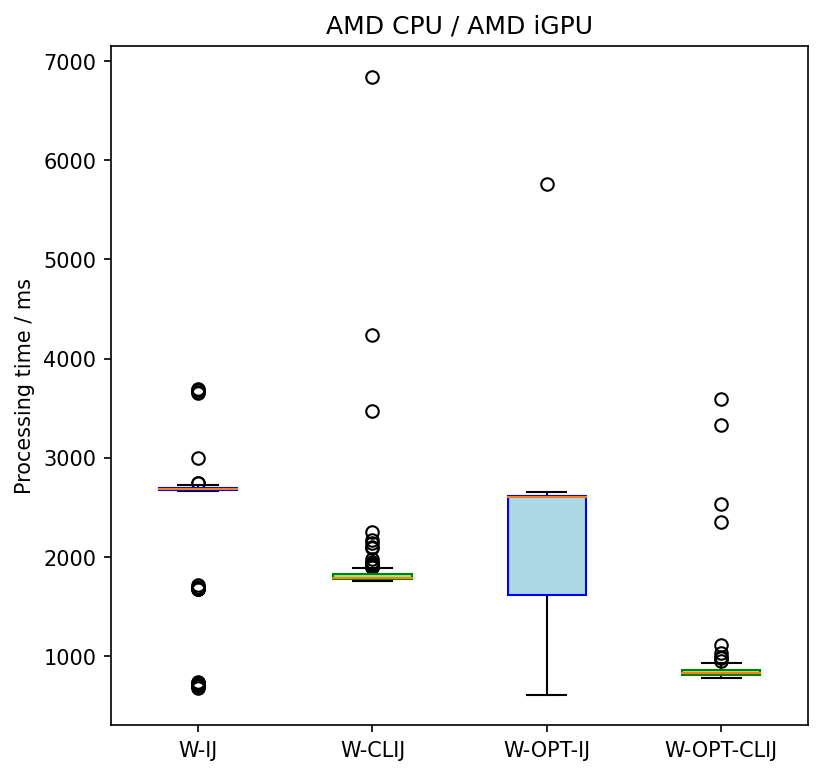

In [5]:
draw_box_plot(
    [
        data3_W_IJ, 
        data3_W_CLIJ, 
        data3_W_OPT_IJ, 
        data3_W_OPT_CLIJ
    ], "AMD CPU / AMD iGPU"
)

plt.savefig("../tex/fig/benchmark_computer3.pdf", dpi=150)

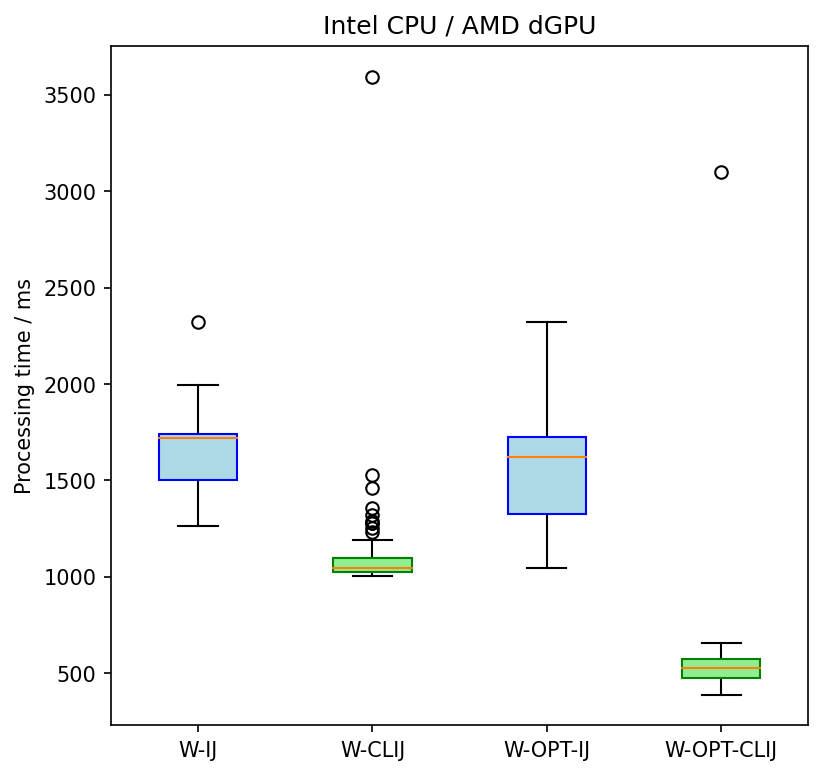

In [6]:
draw_box_plot(
    [
        data4_W_IJ, 
        data4_W_CLIJ, 
        data4_W_OPT_IJ, 
        data4_W_OPT_CLIJ
    ], "Intel CPU / AMD dGPU"
)

plt.savefig("../tex/fig/benchmark_computer4.pdf", dpi=150)

## Summarize some measurements

In [7]:
# Determine speedup range between the optimized CLIJ workflow and the original ImageJ workflow
speedup1_W_CLIJ = np.median(data1_W_IJ) / np.median(data1_W_CLIJ)
speedup2_W_CLIJ = np.median(data2_W_IJ) / np.median(data2_W_CLIJ)
speedup3_W_CLIJ = np.median(data3_W_IJ) / np.median(data3_W_CLIJ)
speedup4_W_CLIJ = np.median(data4_W_IJ) / np.median(data4_W_CLIJ)

speedups_W_CLIJ = [speedup1_W_CLIJ, speedup2_W_CLIJ, speedup3_W_CLIJ, speedup4_W_CLIJ]

print("Median speedup factor of W_CLIJ ranges between " + str(np.min(speedups_W_CLIJ)) + " and " + str(np.max(speedups_W_CLIJ)))

Median speedup factor of W_CLIJ ranges between 1.4997208263539923 and 2.7128011336797355


In [8]:
# Determine speedup range between the optimized CLIJ workflow and the original ImageJ workflow
speedup1_W_OPT_CLIJ = np.median(data1_W_IJ) / np.median(data1_W_OPT_CLIJ)
speedup2_W_OPT_CLIJ = np.median(data2_W_IJ) / np.median(data2_W_OPT_CLIJ)
speedup3_W_OPT_CLIJ = np.median(data3_W_IJ) / np.median(data3_W_OPT_CLIJ)
speedup4_W_OPT_CLIJ = np.median(data4_W_IJ) / np.median(data4_W_OPT_CLIJ)

speedups_W_OPT_CLIJ = [speedup1_W_OPT_CLIJ, speedup2_W_OPT_CLIJ, speedup3_W_OPT_CLIJ, speedup4_W_OPT_CLIJ]

print("Median speedup factor of W_OPT_CLIJ ranges between " + str(np.min(speedups_W_OPT_CLIJ)) + " and " + str(np.max(speedups_W_OPT_CLIJ)))

Median speedup factor of W_OPT_CLIJ ranges between 3.249848759830611 and 5.5115163147792705
